# 机器学习：聚类实验

## 数据预处理

In [12]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import time

### 数据内容展示

In [13]:
original_data = pd.read_csv('./dataset/original.csv',index_col=0)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 1 to 7050
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   object 
 1   status_published  7050 non-null   object 
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
 11  Column1           0 non-null      float64
 12  Column2           0 non-null      float64
 13  Column3           0 non-null      float64
 14  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(2)
memory usage: 881.2+ KB


### 数据唯一值展示

In [14]:
original_data.nunique()

status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

### 展现文件数据样例

In [15]:
original_data.head(15)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN


### 数据清洗：清洗掉最后四列的无用数据

In [16]:
clean_data = original_data.dropna(axis=1)
clean_data.head(15)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0


### 数据清洗：编码非数值信息`status_type`

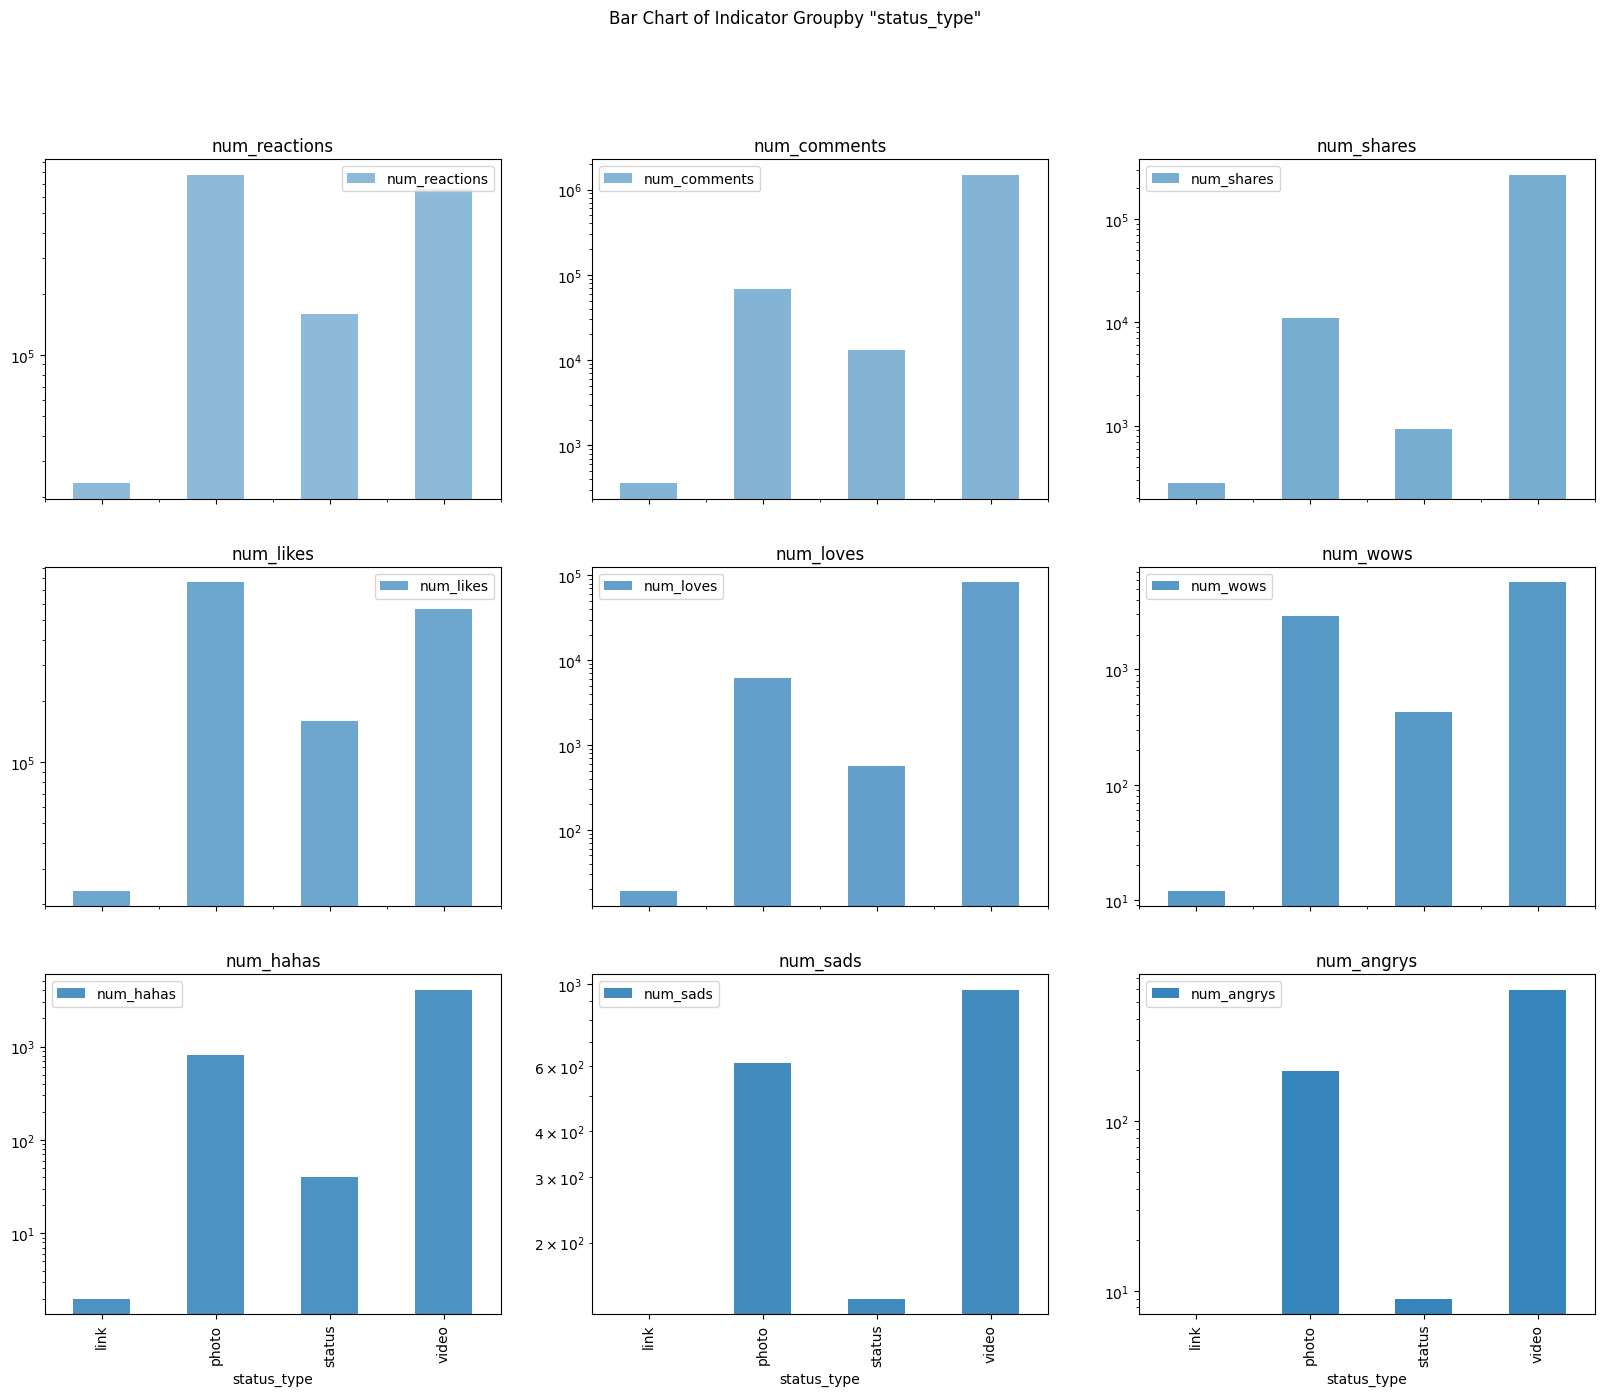

In [17]:
# 可视化数据
# 通过status_type分组画柱状图，
# status_id有四种选择：status，link，photo，video
labels=['num_reactions','num_comments','num_shares',
       'num_likes','num_loves','num_wows',
       'num_hahas','num_sads','num_angrys']

fig = plt.figure(figsize=(20,15))
fig.suptitle('Bar Chart of Indicator Groupby "status_type"')
for num in range(len(labels)):
    ax=fig.add_subplot(3,3,num+1)
    clean_data.groupby('status_type').sum().plot(
        ax=ax,
        sharex=True,
        subplots=True,
        alpha=0.5+0.05*num,
        kind='bar',
        y=labels[num],
        logy=True)
fig.savefig('./result/img/1.Group_labels_bar.png')


In [18]:
# 对分类变量进行编码，
# 即把无法数值表示的status_type编码成数值
# 0 = link,
# 1 = photo,
# 2 = status,
# 3 = video
labelEncoder = LabelEncoder()
labelEncoder.fit(clean_data['status_type'])
clean_data['status_type'] = labelEncoder.transform(clean_data['status_type'])

clean_data.head(15)

/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/3028522385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['status_type'] = labelEncoder.transform(clean_data['status_type'])


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
1,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
3,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
4,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
5,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
6,1,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
7,3,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
8,3,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
9,1,4/17/2018 3:33,203,1,0,198,5,0,0,0,0


### 数据清洗：对`status_published`进行编码

In [19]:
def return_timestamp(timer):
    timestamp = time.mktime(time.strptime(timer, '%m/%d/%Y %H:%M'))
    print(timestamp)
    return timestamp

In [20]:
published = clean_data['status_published'].tolist()
times = []
for timi in published:
    times.append(return_timestamp(timi))
clean_data['time'] = pd.DataFrame(times)
clean_data.drop(['status_published'],axis=1,inplace=True)

1524348000.0
1524321900.0
1524262620.0
1524248940.0
1523992920.0
1523988840.0
1523982240.0
1523922120.0
1523907180.0
1523393580.0
1523293260.0
1523210760.0
1523135400.0
1523125380.0
1522891380.0
1522530960.0
1522369680.0
1522024080.0
1521760140.0
1521653100.0
1521592800.0
1521589560.0
1521482040.0
1521480480.0
1521476100.0
1521470040.0
1521245220.0
1521244020.0
1520805060.0
1520552700.0
1520546100.0
1520399400.0
1520374380.0
1520369160.0
1520209920.0
1520189280.0
1519955700.0
1519777140.0
1519753380.0
1519606200.0
1519524780.0
1519143540.0
1518970260.0
1518909300.0
1518877800.0
1518812100.0
1518637620.0
1518567780.0
1518455760.0
1518377280.0
1518299700.0
1518220440.0
1518112080.0
1518052440.0
1517963700.0
1517877960.0
1517793600.0
1517685900.0
1517618040.0
1517534640.0
1517526480.0
1517522460.0
1517097000.0
1517088300.0
1516942980.0
1516942920.0
1516927620.0
1516840800.0
1516669440.0
1516585020.0
1516583700.0
1516497000.0
1516461000.0
1516410480.0
1516324560.0
1516323960.0
1516236840.0

/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/835440128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['time'] = pd.DataFrame(times)
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/835440128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['status_published'],axis=1,inplace=True)


In [21]:
clean_data.head(15)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,time
status_id,,,,,,,,,,,
1,3,529,512,262,432,92,3,1,1,0,1.524322e+09
2,1,150,0,0,150,0,0,0,0,0,1.524263e+09
3,3,227,236,57,204,21,1,1,0,0,1.524249e+09
4,1,111,0,0,111,0,0,0,0,0,1.523993e+09
5,1,213,0,0,204,9,0,0,0,0,1.523989e+09
6,1,217,6,0,211,5,1,0,0,0,1.523982e+09
7,3,503,614,72,418,70,10,2,0,3,1.523922e+09
8,3,295,453,53,260,32,1,1,0,1,1.523907e+09
9,1,203,1,0,198,5,0,0,0,0,1.523394e+09


### 数据清洗：时间戳归一化

In [22]:
times = clean_data['time'].to_list()
for time in times:
    time = float(time)
min_ts = min(times)
max_ts = max(times)
new_time = []
for time in times:
    time = (time-min_ts)/(max_ts-min_ts)
    new_time.append(time)
clean_data['final_time'] = pd.DataFrame(new_time)
clean_data.drop(['time'],axis=1,inplace=True)

/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/1153161619.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['final_time'] = pd.DataFrame(new_time)
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/1153161619.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['time'],axis=1,inplace=True)


In [23]:
clean_data.head(15)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,final_time
status_id,,,,,,,,,,,
1,3,529,512,262,432,92,3,1,1,0,0.975549
2,1,150,0,0,150,0,0,0,0,0,0.975476
3,3,227,236,57,204,21,1,1,0,0,0.974103
4,1,111,0,0,111,0,0,0,0,0,0.974081
5,1,213,0,0,204,9,0,0,0,0,0.974046
6,1,217,6,0,211,5,1,0,0,0,0.973723
7,3,503,614,72,418,70,10,2,0,3,0.973643
8,3,295,453,53,260,32,1,1,0,1,0.970890
9,1,203,1,0,198,5,0,0,0,0,0.970352


### 数据清洗：产生组合特征

In [24]:
clean_data['new_reaction_count'] = clean_data.iloc[:,5:10].sum(axis=1)
clean_data['positive_reactions'] = clean_data.iloc[:,4:7].sum(axis=1)
clean_data['negative_reactions'] = clean_data.iloc[:,7:10].sum(axis=1)

clean_data.head(15)

/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/795222764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['new_reaction_count'] = clean_data.iloc[:,5:10].sum(axis=1)
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/795222764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['positive_reactions'] = clean_data.iloc[:,4:7].sum(axis=1)
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_54331/795222764.py:3: SettingWithCopyWarning: 
A value is 

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,final_time,new_reaction_count,positive_reactions,negative_reactions
status_id,,,,,,,,,,,,,,
1,3,529,512,262,432,92,3,1,1,0,0.975549,97,527,2
2,1,150,0,0,150,0,0,0,0,0,0.975476,0,150,0
3,3,227,236,57,204,21,1,1,0,0,0.974103,23,226,1
4,1,111,0,0,111,0,0,0,0,0,0.974081,0,111,0
5,1,213,0,0,204,9,0,0,0,0,0.974046,9,213,0
6,1,217,6,0,211,5,1,0,0,0,0.973723,6,217,0
7,3,503,614,72,418,70,10,2,0,3,0.973643,85,498,5
8,3,295,453,53,260,32,1,1,0,1,0.970890,35,293,2
9,1,203,1,0,198,5,0,0,0,0,0.970352,5,203,0


In [25]:
clean_data['interest'] = (clean_data.num_comments+clean_data.num_shares)/clean_data.num_reactions
clean_data.replace([np.inf,-np.inf,np.nan],0.0,inplace=True)
clean_data.head(15)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,final_time,new_reaction_count,positive_reactions,negative_reactions,interest
status_id,,,,,,,,,,,,,,,
1,3,529,512,262,432,92,3,1,1,0,0.975549,97,527,2,1.463138
2,1,150,0,0,150,0,0,0,0,0,0.975476,0,150,0,0.000000
3,3,227,236,57,204,21,1,1,0,0,0.974103,23,226,1,1.290749
4,1,111,0,0,111,0,0,0,0,0,0.974081,0,111,0,0.000000
5,1,213,0,0,204,9,0,0,0,0,0.974046,9,213,0,0.000000
6,1,217,6,0,211,5,1,0,0,0,0.973723,6,217,0,0.027650
7,3,503,614,72,418,70,10,2,0,3,0.973643,85,498,5,1.363817
8,3,295,453,53,260,32,1,1,0,1,0.970890,35,293,2,1.715254
9,1,203,1,0,198,5,0,0,0,0,0.970352,5,203,0,0.004926


### 预处理结果

In [26]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 1 to 7050
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_type         7050 non-null   int64  
 1   num_reactions       7050 non-null   int64  
 2   num_comments        7050 non-null   int64  
 3   num_shares          7050 non-null   int64  
 4   num_likes           7050 non-null   int64  
 5   num_loves           7050 non-null   int64  
 6   num_wows            7050 non-null   int64  
 7   num_hahas           7050 non-null   int64  
 8   num_sads            7050 non-null   int64  
 9   num_angrys          7050 non-null   int64  
 10  final_time          7050 non-null   float64
 11  new_reaction_count  7050 non-null   int64  
 12  positive_reactions  7050 non-null   int64  
 13  negative_reactions  7050 non-null   int64  
 14  interest            7050 non-null   float64
dtypes: float64(2), int64(13)
memory usage: 881.2 KB


In [27]:
clean_data.to_csv('./dataset/clean.csv',index=True)

## 数据处理后特征可视化

In [28]:
names=['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','final_time',
       'new_reaction_count','postive_reactions','negative_reactions','interest']

### 特征可视化：`status_type`

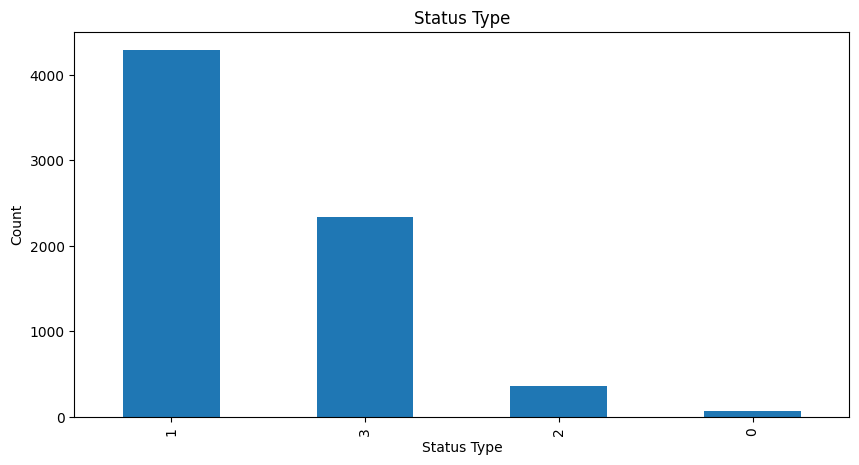

In [29]:
st_ax = clean_data.status_type.value_counts().plot(kind='bar', figsize=(10,5), title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

fig = st_ax.figure
fig.savefig('./result/img/2.vis_status_type.png',dpi=300)

### 特征分布

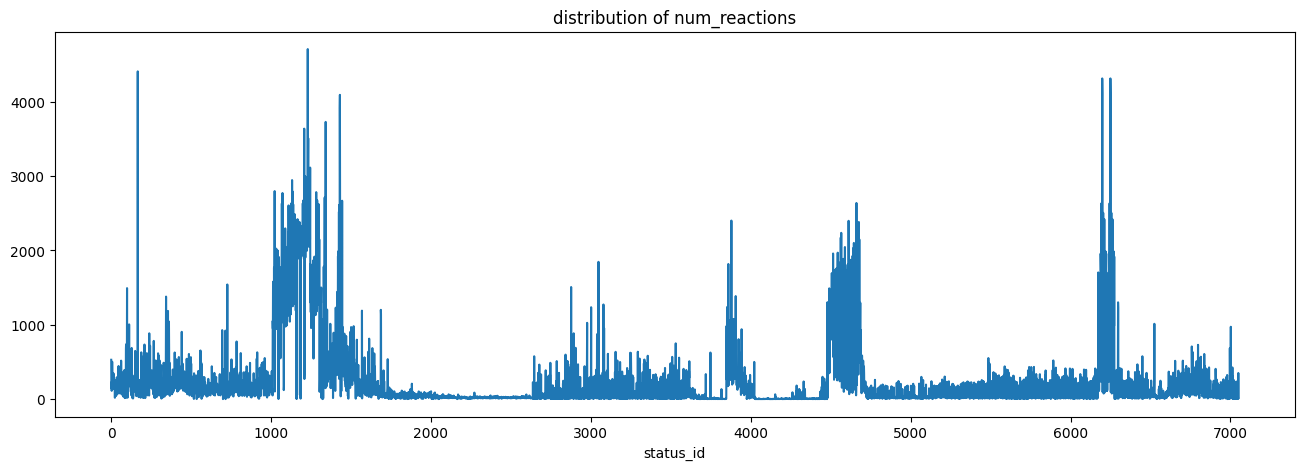

In [30]:
nr_ax = clean_data.num_reactions.plot(kind='line', figsize=(16,5), title='distribution of num_reactions')

fig = nr_ax.figure
fig.savefig('./result/img/2.vis_num_reactions.png',dpi=300)

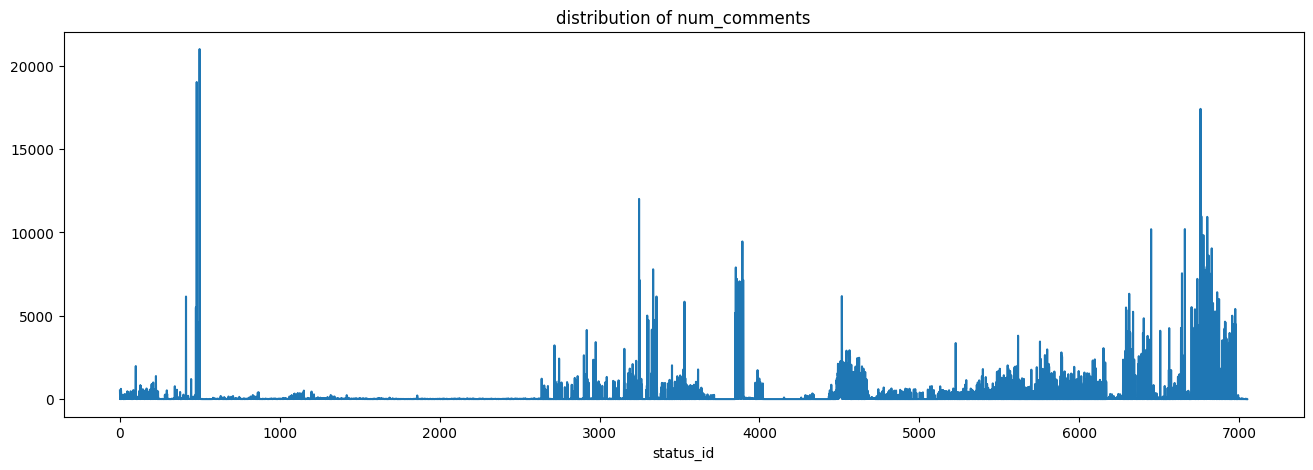

In [31]:
nr_nc = clean_data.num_comments.plot(kind='line', figsize=(16,5), title='distribution of num_comments')

fig = nr_nc.figure
fig.savefig('./result/img/2.vis_num_comments.png',dpi=300)

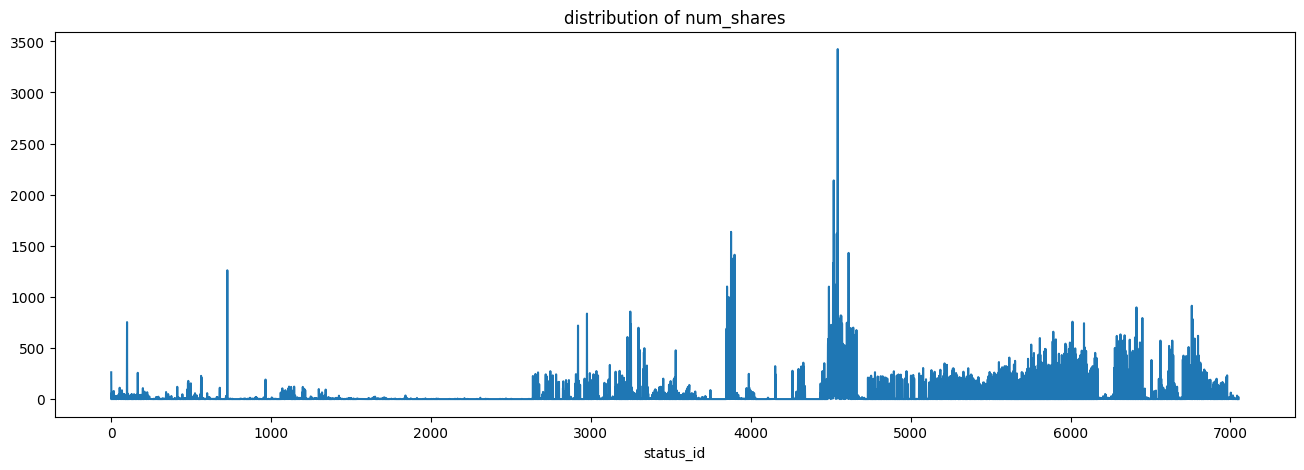

In [32]:
nr_ns = clean_data.num_shares.plot(kind='line', figsize=(16,5), title='distribution of num_shares')

fig = nr_ns.figure 
fig.savefig('./result/img/2.vis_num_shares.png',dpi=300)

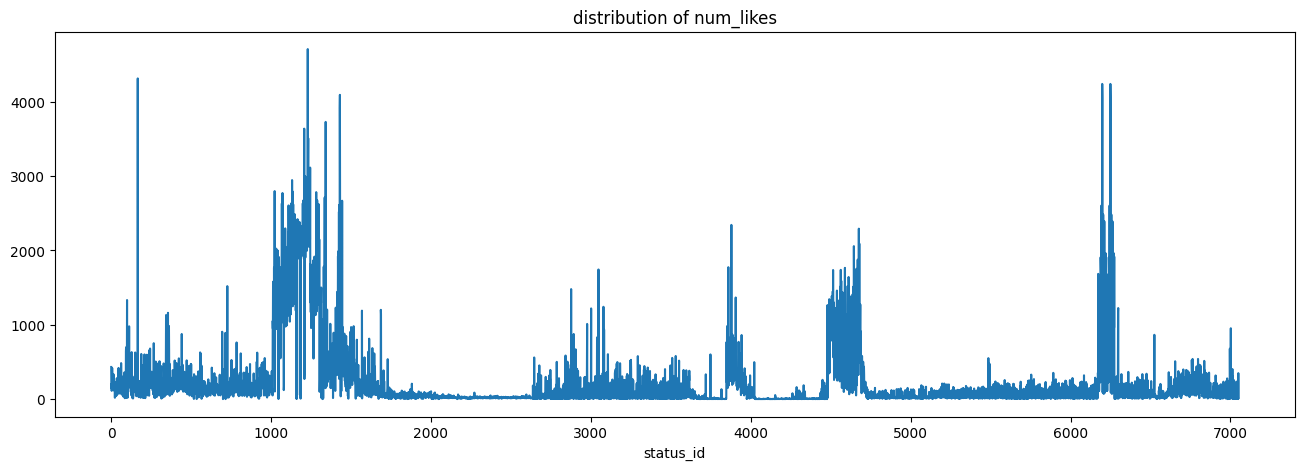

In [33]:
nr_nl = clean_data.num_likes.plot(kind='line', figsize=(16,5), title='distribution of num_likes')

fig = nr_nl.figure
fig.savefig('./result/img/2.vis_num_likes.png',dpi=300)

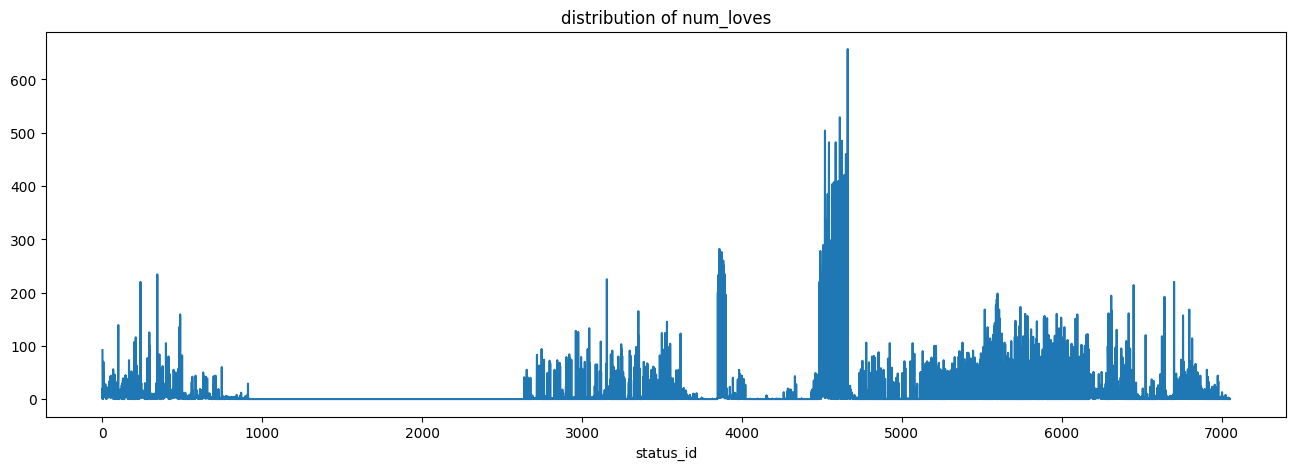

In [34]:
nr_nl = clean_data.num_loves.plot(kind='line',figsize=(16,5),title='distribution of num_loves')

fig = nr_nl.figure 
fig.savefig('./result/img/2.vis_num_loves.png',dpi=300)

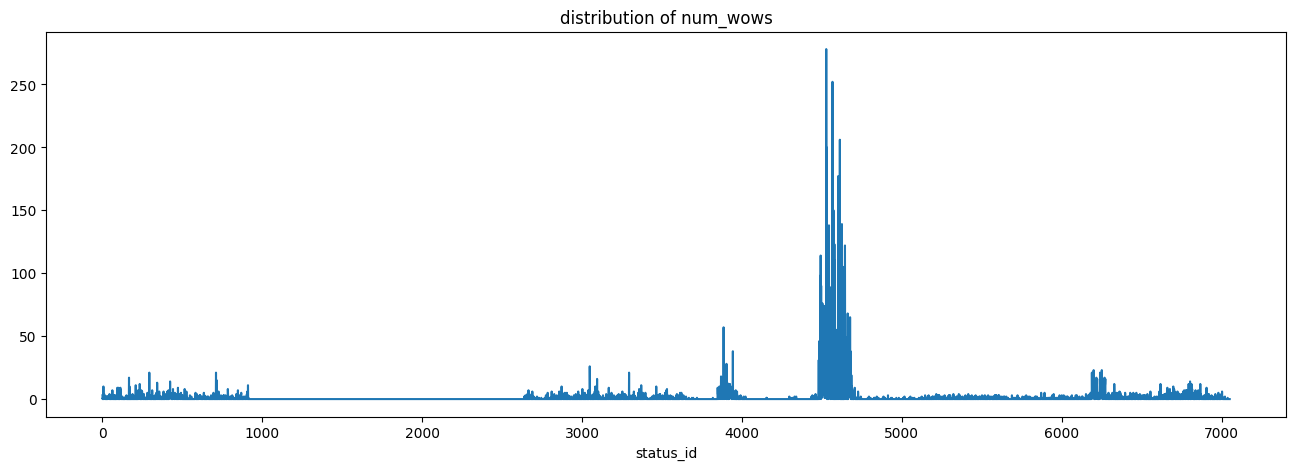

In [35]:
nr_nw = clean_data.num_wows.plot(kind='line', figsize=(16,5), title='distribution of num_wows')

fig = nr_nw.figure
fig.savefig('./result/img/2.vis_num_wows.png',dpi=300)

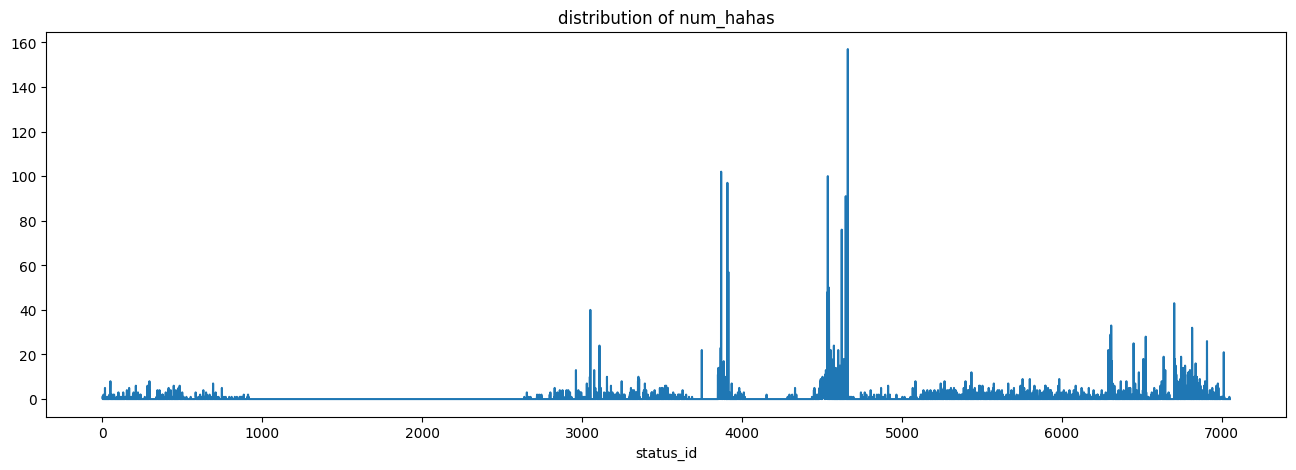

In [36]:
nr_nh = clean_data.num_hahas.plot(kind='line', figsize=(16,5), title='distribution of num_hahas')

fig = nr_nh.figure 
fig.savefig('./result/img/2.vis_num_hahas.png',dpi=300)

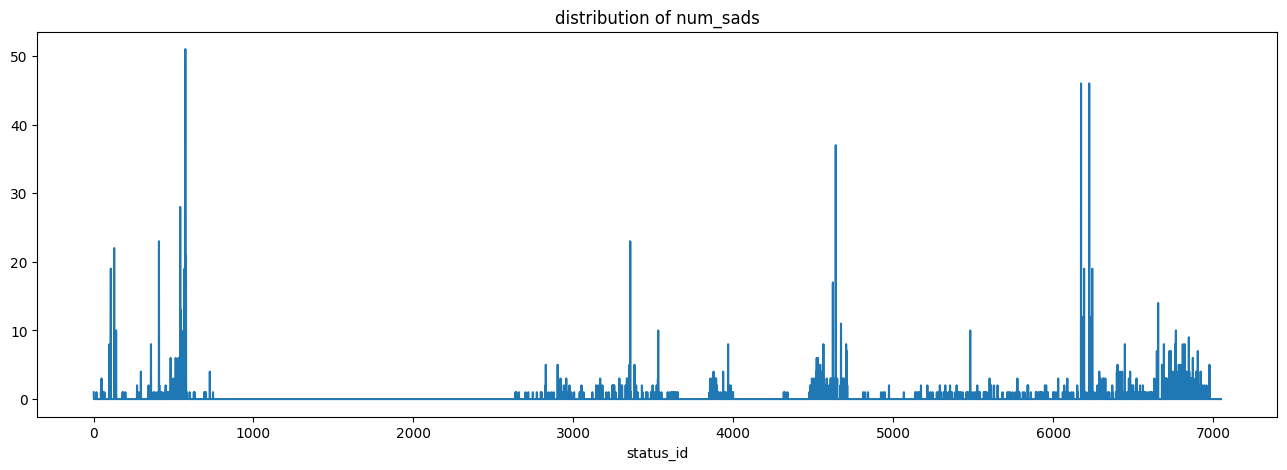

In [37]:
nr_nc = clean_data.num_sads.plot(kind='line', figsize=(16,5), title='distribution of num_sads')

fig = nr_nc.figure 
fig.savefig('./result/img/2.vis_num_sads.png',dpi=300)

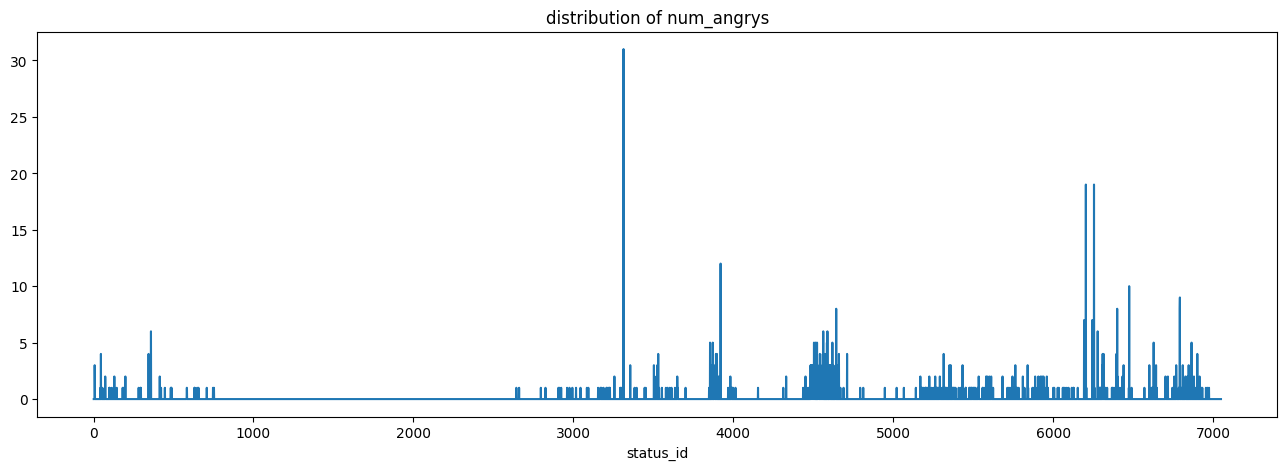

In [38]:
nr_na = clean_data.num_angrys.plot(kind='line', figsize=(16,5), title='distribution of num_angrys')

fig = nr_na.figure
fig.savefig('./result/img/2.vis_num_angrys.png',dpi=300)

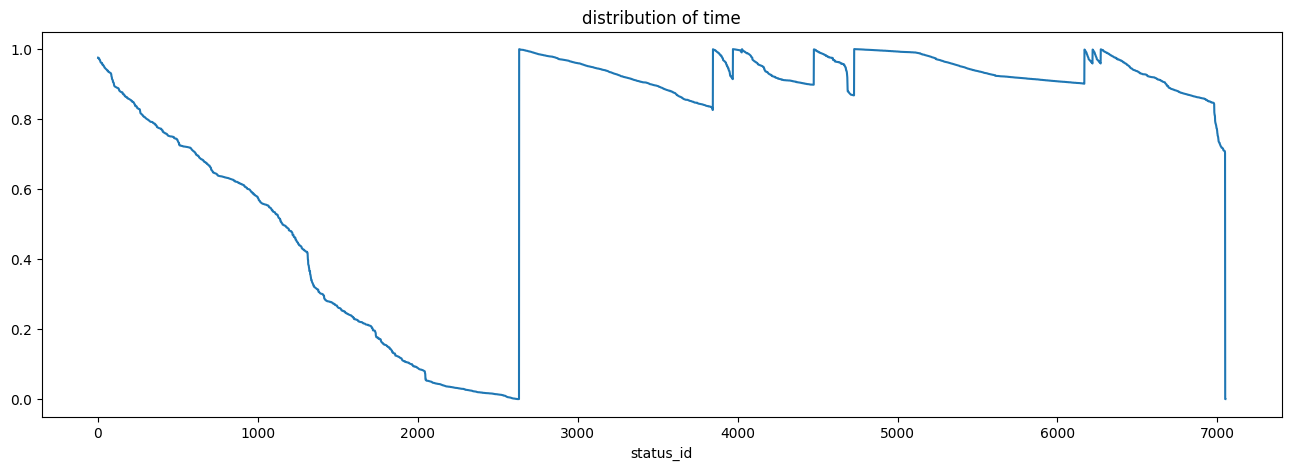

In [39]:
nr_time = clean_data.final_time.plot(kind='line',figsize=(16,5),title='distribution of time')

fig = nr_time.figure
fig.savefig('./result/img/2.vis_time.png',dpi=300)

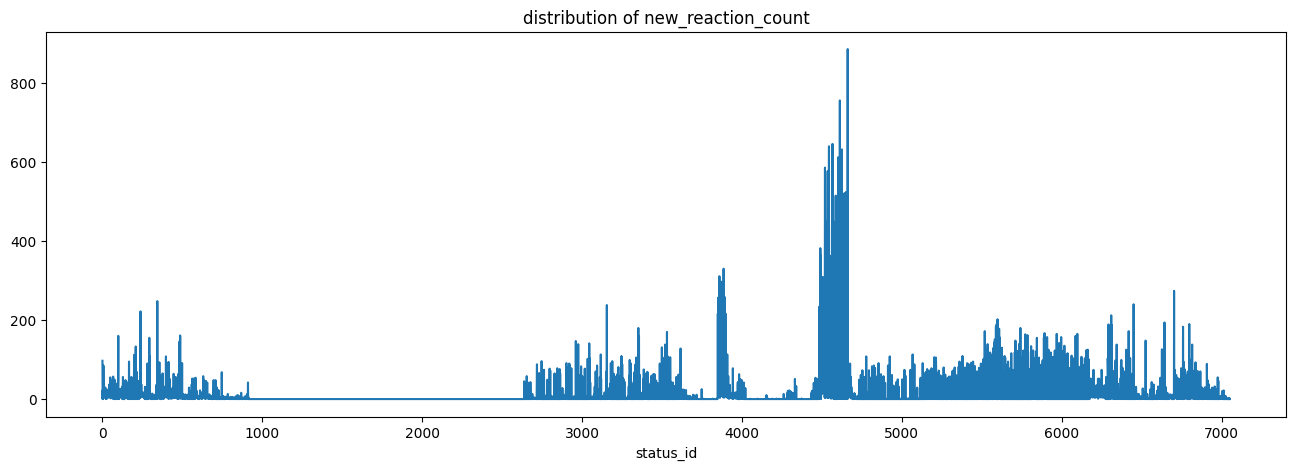

In [40]:
nr_nr = clean_data.new_reaction_count.plot(kind='line', figsize=(16,5), title='distribution of new_reaction_count')

fig = nr_nr.figure
fig.savefig('./result/img/2.vis_new_reaction_count.png',dpi=300)

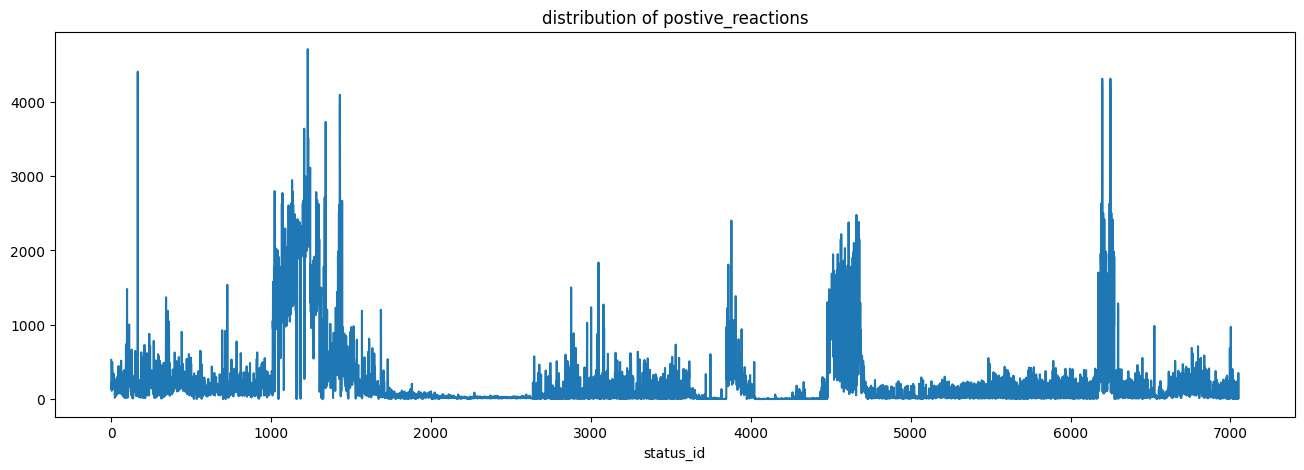

In [41]:
nr_pr = clean_data.positive_reactions.plot(kind='line', figsize=(16,5), title='distribution of postive_reactions')

fig = nr_pr.figure 
fig.savefig('./result/img/2.vis_positive_reactions.png',dpi=300)

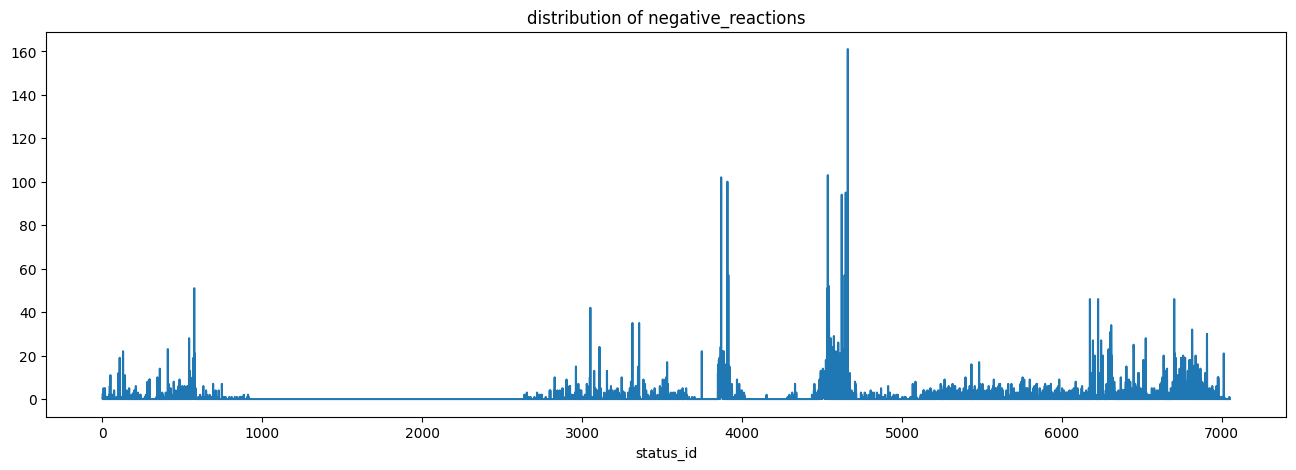

In [42]:
nr_nr = clean_data.negative_reactions.plot(kind='line', figsize=(16,5), title='distribution of negative_reactions')

fig = nr_nr.figure 
fig.savefig('./result/img/2.vis_negative_reactions.png',dpi=300)

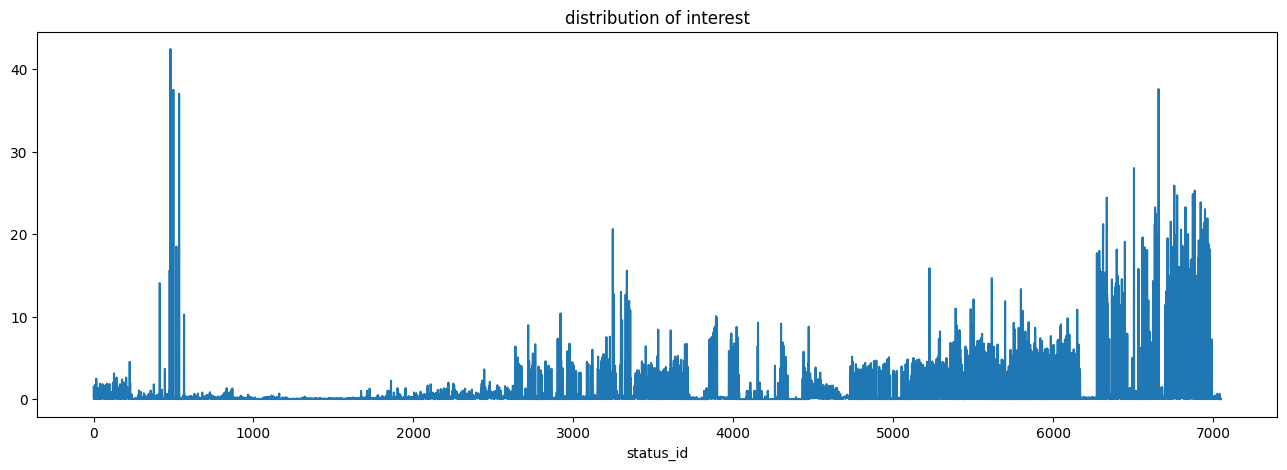

In [43]:
nr_i = clean_data.interest.plot(kind='line', figsize=(16,5), title='distribution of interest')

fig = nr_i.figure
fig.savefig('./result/img/2.vis_interest.png',dpi=300)

There are 7050 rows and 16 columns


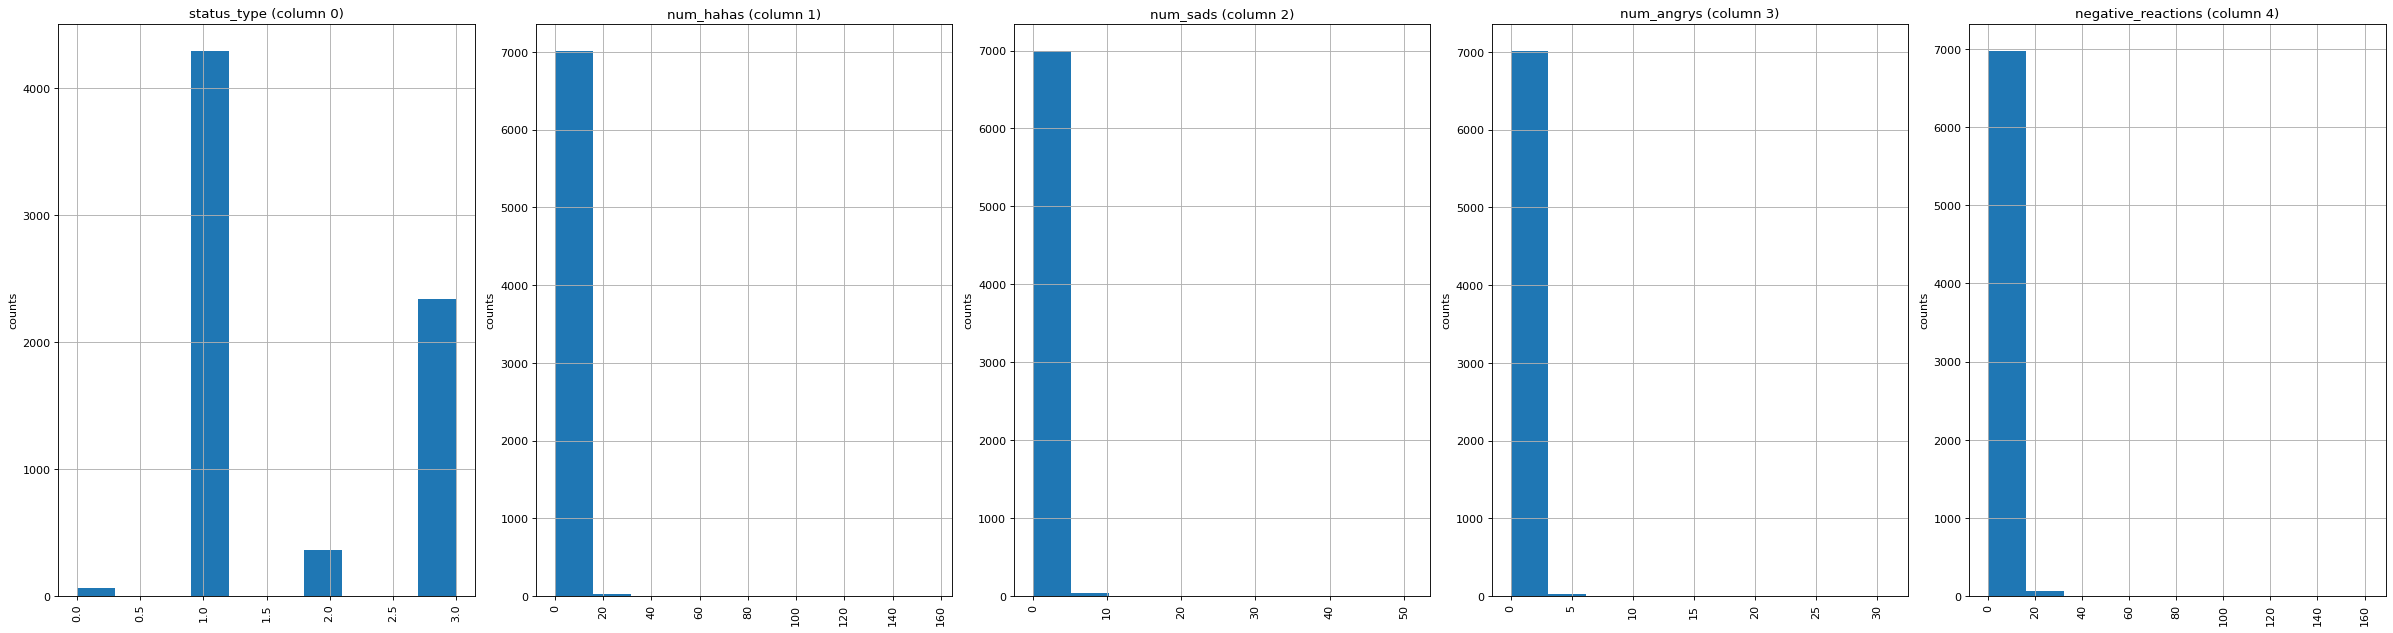

In [55]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

nRowsRead = 7050
df1 = pd.read_csv('./dataset/clean.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'clean.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

plotPerColumnDistribution(df1, 10, 5)

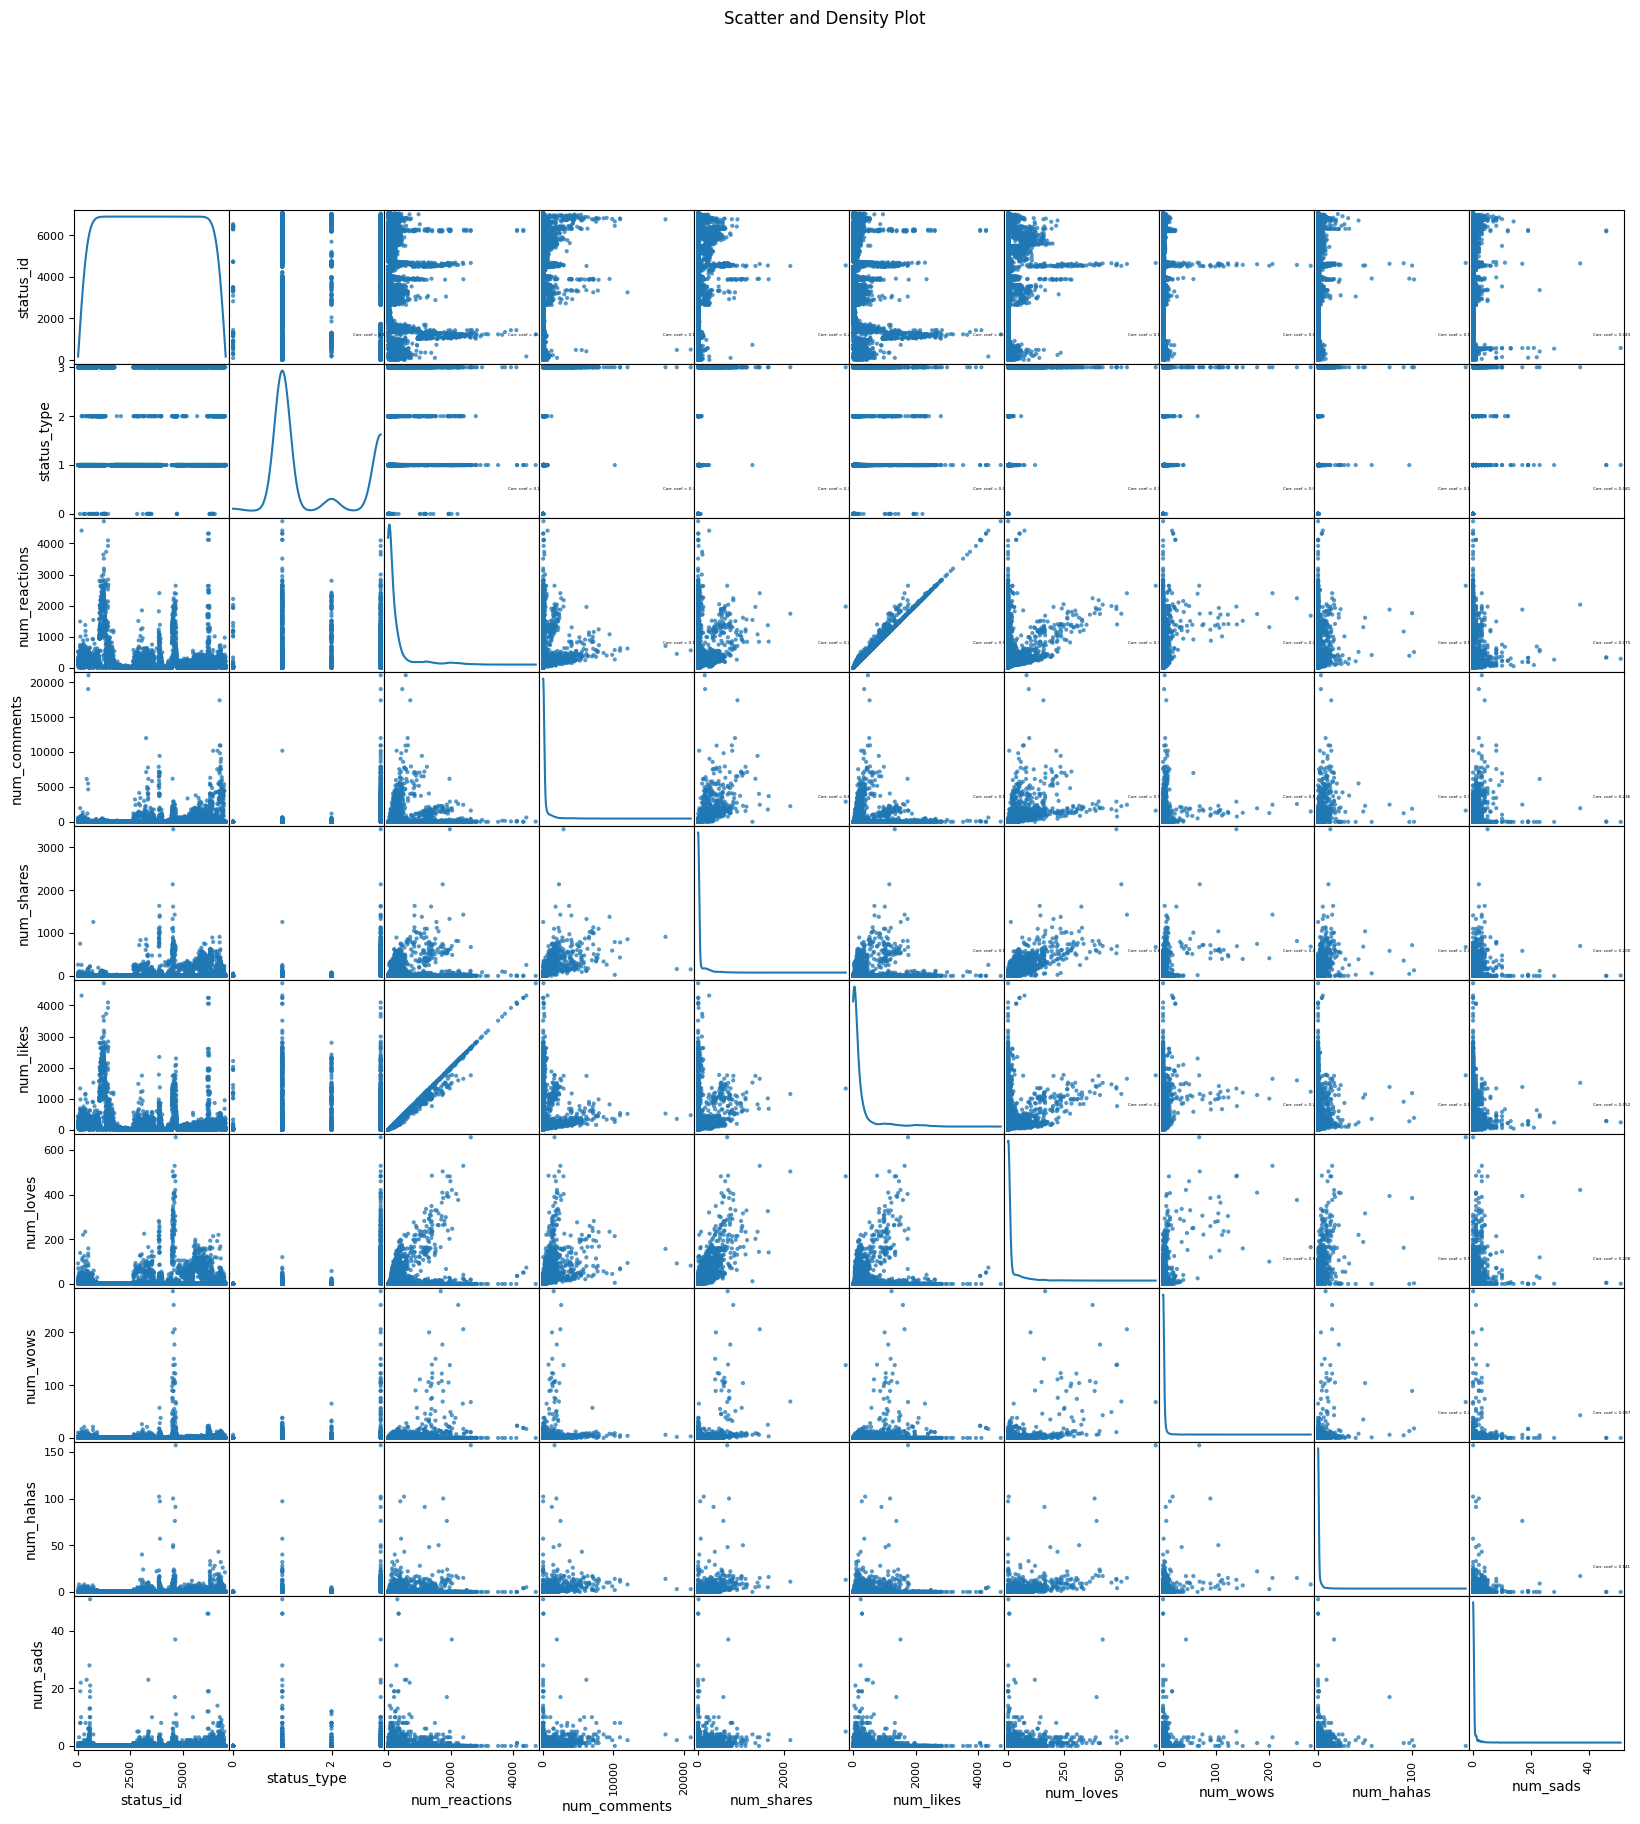

In [56]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='left', va='top', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df1, 20, 3)

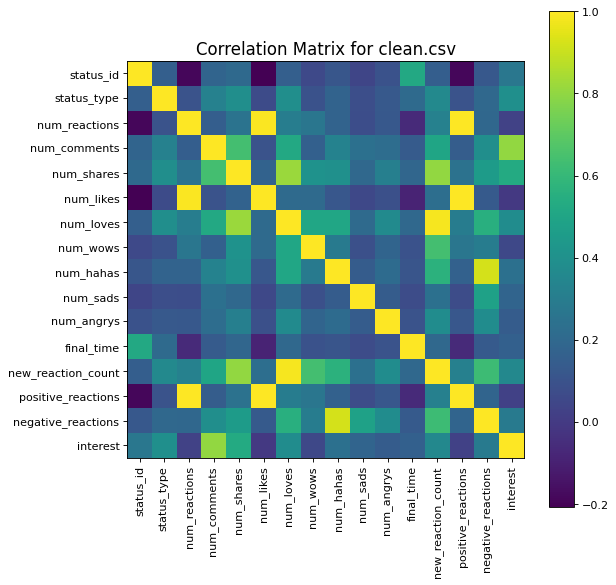

In [57]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(df1, 8)